# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

O primeiro passo é verificar como é a base de dados:

In [4]:
dataframe.head(5)

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


Text(0.5, 1.0, 'DISTRIBUIÇÃO NORMAL')

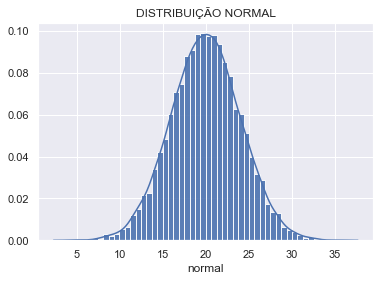

In [5]:
#distribuição da probabilidade - COLUNA NORMAL
sns.distplot(dataframe['normal'],hist_kws={"alpha": 0.9})
plt.title("DISTRIBUIÇÃO NORMAL")

Text(0.5, 1.0, 'DISTRIBUIÇÃO BINOMIAL')

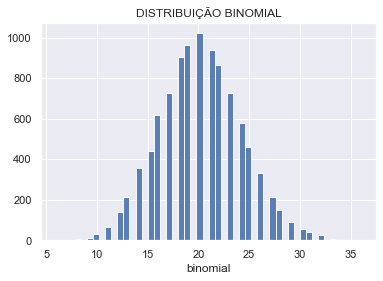

In [6]:
#distribuição da probabilidade - COLUNA BINOMIAL
sns.distplot(dataframe['binomial'],kde=False,hist_kws={"alpha": 0.9})
plt.title("DISTRIBUIÇÃO BINOMIAL")

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

Para ajudar na visualização da diferença esperada, foi feito um boxplot para cada distribuição:

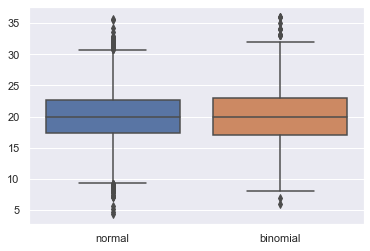

In [7]:
ax = sns.boxplot(data=dataframe)

Agora, coletando os dados dos quartis. Poderia ter sido usada a função sct.norm.ppf() e sct.binom.ppf() para obter os valores dos quartis. Mas por uma questão de praticidade, foi utilizada a função .describe() do Pandas.

In [8]:
(q1_norm,q2_norm,q3_norm) = dataframe['normal'].describe()[4:7]
(q1_binom,q2_binom,q3_binom) = dataframe['binomial'].describe()[4:7]
a = float(format(q1_norm - q1_binom,'.3f'))
b = float(format(q2_norm - q2_binom,'.3f'))
c = float(format(q3_norm - q3_binom,'.3f'))
print("Resultado: ",(a,b,c))

Resultado:  (0.31, -0.01, -0.316)


Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Os valores pequenos já eram esperados, dado que uma distribuição binomial com uma quantidade grande de amostras pode ser aproximada para uma distribuição normal.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

A ideia de utilizar uma distribuição CDF empírica é que não há o problema de se preocupar com o número de divisões para ilustrar o formato da distribuição de dados. 

In [14]:
mean,std = dataframe['normal'].describe()[1:3]
ecdf = ECDF(dataframe['normal'])
#A IDEIA É CALCULAR P(X-S <X < X+S), um processo 2sigma com valor de 68%
print("Probabilidade: ",round(ecdf(mean+std) - ecdf(mean-std),3))

Probabilidade:  0.684


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Sim, se aproxima. O esperado teórico é dado por:

In [16]:
round(sct.norm.cdf(mean+std,loc=mean,scale=std) - sct.norm.cdf(mean-std,loc=mean,scale=std),3)

0.683

In [18]:
#PARA PROCESSOS 4 SIGMA:
print("Probabilidade(4SIGMA): ",round(ecdf(mean+2*std) - ecdf(mean-2*std),4))
#PARA PROCESSOS 6 SIGMA:
print("Probabilidade(4SIGMA): ",round(ecdf(mean+3*std) - ecdf(mean-3*std),4))

Probabilidade(4SIGMA):  0.9538
Probabilidade(4SIGMA):  0.9973


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [20]:
(m_norm,std_norm) = dataframe['normal'].describe()[1:3]
(m_binom,std_binom) = dataframe['binomial'].describe()[1:3]
print("Diferença de medias: ",round(m_binom - m_norm,3),"Diferença de variâncias: ",round(std_binom**2 - std_norm**2,3))

Diferença de medias:  0.106 Diferença de variâncias:  0.22


Para refletir:

* Você esperava valores dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

Pelo boxplot já havia se notado que as distribuições estavam semelhantes, então essas diferenças pequenas já eram esperadas.

In [24]:
data2= pd.DataFrame({"binomial_100": sct.binom.rvs(100, 0.2, size=10000),"binomial_10":sct.binom.rvs(10, 0.2, size=10000),
                      "binomial_500":sct.binom.rvs(500, 0.2, size=10000)})

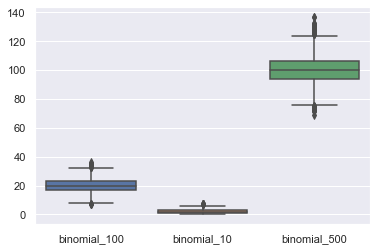

In [25]:
ax = sns.boxplot(data=data2)

As mudanças foram bem notáveis, dado que o parâmetro n influencia diretamente na média e no desvio padrão, dados por: $$\mathbb{E}[X] = np$$ e $$\text{Var}[X] = np(1 - p) = npq$$

## Parte 2

### _Setup_ da parte 2

In [26]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [28]:
stars.head(5)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [29]:
#FILTRANDO OS VALORES DE MEAN_PROFILE COM TARGET 0:
filtro = stars['mean_profile'].loc[stars['target'] == False]

Para ilustrar a formula matemática da padronização: $$Z = \frac{X - \mu}{\sigma}$$, será utilizada a própria fórmula ao invés da função StandardScaler da biblioteca sklearn.

In [30]:
false_pulsar_mean_profile_standardized = (filtro - filtro.mean()) / filtro.std()

In [33]:
#ENCONTRANDO QUANTIS TEÓRICOS PARA 0.8, 0.9 E 0.95
q_08,q_09,q_095 = sct.norm.ppf((0.8,0.9,0.95),loc=0,scale=1)

Aplicando a função ECDF na feature false_pulsar_mean_profile_standardized:

In [35]:
ecdf = ECDF(false_pulsar_mean_profile_standardized)

In [38]:
print("Probabilidades para q_08,q_09 e q_0,95: ",ecdf((0.8,0.9,0.95)))

Probabilidades para q_08,q_09 e q_0,95:  [0.79142576 0.82021159 0.83398942]


Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Os valores de 0.9 e 0.95 estão bem diferentes do esperado. A única explicação é se a variável false_pulsar_mean_profile_standardized apresentar alguma assimetria ou não ser uma distribuição normal.

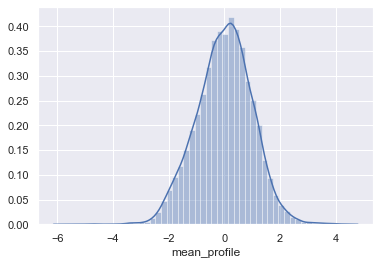

In [40]:
sns.distplot(false_pulsar_mean_profile_standardized)

Visualmente, aparenta ser uma distribuição normal, mas é necessário um teste de hipótese para validar a normalidade da distribuição (Próximo desafio)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [43]:
#teóricos
Q1t,Q2t,Q3t = sct.norm.ppf((0.25,0.5,0.75),loc=0,scale=1)

Para os quantis da feature false_pulsar_mean_profile_standardized, utiliza-se a função np.quantile, da biblioteca numpy:

In [44]:
Q1,Q2,Q3 = np.quantile(false_pulsar_mean_profile_standardized,[0.25,0.5,0.75])

In [45]:
print("Diferença entre quartis Q1-Q2-Q3: ",round(Q1t-Q1,3),"-",round(Q2t-Q2,3),"-",round(Q3t-Q3,3))

Diferença entre quartis Q1-Q2-Q3:  -0.027 - -0.04 - 0.004


Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

Fazem sentido, podem indicar que de fato, a distribuição da feature false_pulsar_mean_profile_standardized é normal.